# **Multiple Linear Regression of the Dataset "cacao.csv"**

## **Installing and Loading Libraries**

Firstly we need to import different libraries that we use to perform the multiple linear regression and install them if not done yet:


In [2]:
# Install the newest version of pip

!python -m pip install --upgrade pip

In [78]:
# Install numpy, pandas and sklearn IF NOT INSTALLED

%pip install numpy >nul & pip install pandas >nul & pip install matplotlib >nul & pip install scikit-learn >nul & pip install seaborn >nul & pip install statsmodels >nul

Note: you may need to restart the kernel to use updated packages.


In [106]:
%reset -f

# Import libraries

import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import statsmodels.api as sm  # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # type: ignore

## **Starting the Multiple Linear Regression**

### **Reading in the Data**

Firstly, we need to read our dataset into Python:

In [107]:
path = 'C:/Users/phleu/Desktop/Bachelorarbeit_PL/LocalRepository_PL/OLSAI/Datasets/cacao.csv' # path to our dataset
df = pd.read_csv(path)

### **Variables of the Dataset**

In [108]:
col_names = df.columns.tolist()
total_num_of_var = len(col_names)-1

print("We have a total number of " + str(total_num_of_var) + " variables")
print("Those are presented in this list: " + str(col_names))

We have a total number of 12 variables
Those are presented in this list: ['ant_exclusion', 'stem_diameter', 'height', 'canopy', 'dw_healthy', 'dw_infect', 'dw_total', 'fw_pulb', 'fw_seeds', 'fw_total', 'ab_fl_op', 'ab_fl_cl', 'ab_fl']


### **'stem_diameter' as Dependend Variable**
We decided, that we want to perform a multiple linear regression using stem_diameter as y and all the other variables as predictors.

In [109]:
dependend_var = 'stem_diameter'
y = df[dependend_var]
x = df.drop(dependend_var, axis=1) # axis = 1 to look at columns instead of rows

Now we have to split out data into a training dataset and a test dataset.

The model will be trained by the trainings dataset

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3, random_state=0)

# add a constant to include the intercept in the model

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model = sm.OLS(y_train, x_train).fit()

Let's see how good the model is when all predictors are included

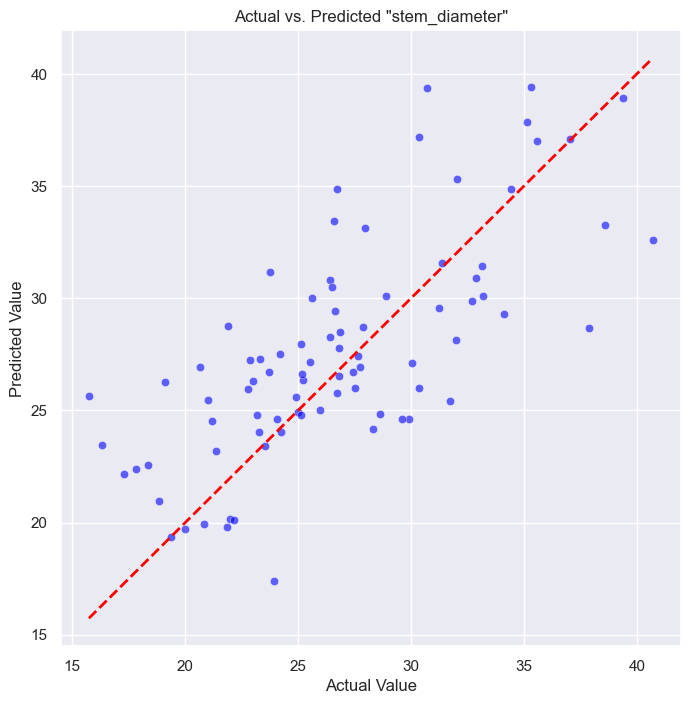

In [112]:

# Test the model

y_test_pred = model.predict(x_test)
pred_values = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Plot actual value vs predicted value


sns.set_theme("notebook")
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Actual', y='Predicted', data=pred_values, color="blue", alpha=0.6)
plt.plot([pred_values['Actual'].min(), pred_values['Actual'].max()], 
         [pred_values['Actual'].min(), pred_values['Actual'].max()], 
         color='red', lw=2, linestyle='--')  # line for perfect predictions
plt.title('Actual vs. Predicted "stem_diameter"')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.show()

In [115]:
r2_score(y_test, y_test_pred)

0.46011433469954854

Because the models r2 score is only 0.46 we can say, that the model is not that good. But how can we improve the model?

## **Improving the Model**

### **Removing Variables**

Firstly, we look at the different $\^{\beta}$ of all our variables.

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          stem_diameter   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     2.596
Date:                 Fr, 07 Jun 2024   Prob (F-statistic):             0.0238
Time:                        14:17:29   Log-Likelihood:                -91.252
No. Observations:                  36   AIC:                             208.5
Df Residuals:                      23   BIC:                             229.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9340      9.175     -0.102      0.920     -19.914      18.046
ant_exclusion    -0.6768      1.751     -0.387      0.703      -4.299       2.946
height            0.0978      0.027      3.678      0.001       0.043       0.153
canopy            0.8492      4.567      0.186      0.854      -8.598      10.297
dw_healthy       -0.0552      0.206     -0.269      0.791      -0.480       0.370
dw_infect        -0.0489      0.203     -0.240      0.812      -0.469       0.372
dw_total          0.0539      0.205      0.263      0.795      -0.369       0.477
fw_pulb          -0.0013      0.003     -0.395      0.697      -0.008       0.005
fw_seeds         -0.0028      0.003     -0.806      0.429      -0.010       0.004
fw_total          0.0017      0.003      0.520      0.608      -0.005       0.009
ab_fl_op          0.0120      0.010      1.169      0.254      -0.009       0.033
ab_fl_cl         -0.0031      0.010     -0.294      0.771      -0.025       0.018
ab_fl            -0.0013      0.010     -0.134      0.894      -0.022       0.019
==============================================================================
Omnibus:                        2.096   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.752
Skew:                           0.401   Prob(JB):                        0.417
Kurtosis:                       2.276   Cond. No.                     4.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Summary: Tables, Plots, Interpretation**